In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression

data=pd.read_csv('/Users/juyoung/Desktop/빅데이터프로그래밍/프로젝트/data/bigpro_test.csv',encoding='utf-8')
data=data[data['OECD']=='v']
data=data.reset_index()
data

,index,Country,OECD,Real_house_price,Safety,Working_age_popul,Elderly_popul,Working_hours,Unemploy_rate,Employ_rate,Gini_coff,2018_GDP,2018_GDP_Rank,Happiness_score,Happiness_score_rank,Sub
0,0,Australia,v,102.2,63.0,65.5,15.7,1712.0,6.498750,74.275,0.325,57354.964046,10,7.272,10,0
1,1,Austria,v,117.9,81.0,66.8,18.8,1501.0,5.333500,73.575,0.280,51478.285262,13,7.139,12,-1
2,2,Belgium,v,106.4,70.0,64.2,18.8,1583.0,5.550000,65.300,0.258,47583.074941,17,6.927,16,-1
3,3,Canada,v,123.4,82.0,66.7,17.2,1670.0,9.600000,74.150,0.303,46313.171371,18,7.328,7,-11
4,4,Chile,v,111.3,48.0,68.7,11.5,1914.0,10.765000,64.125,0.460,15924.794239,45,6.476,25,-20
5,5,Czech Republic,v,131.0,72.0,64.8,19.4,1788.0,2.558250,75.150,0.249,23415.843627,35,6.711,21,-14
6,6,Denmark,v,114.3,84.0,64.0,19.5,1380.0,5.641750,75.050,0.264,61598.536704,9,7.555,3,-6
7,7,Estonia,v,112.4,69.0,64.0,19.7,1711.0,6.766500,75.275,0.305,23170.707378,37,5.739,63,26
8,8,Finland,v,101.1,85.0,62.3,21.6,1540.0,7.783250,72.975,0.269,50030.877311,14,7.632,1,-13
9,9,France,v,106.8,71.0,62.1,19.8,1505.0,8.050000,65.550,0.301,41631.090739,23,6.489,23,0


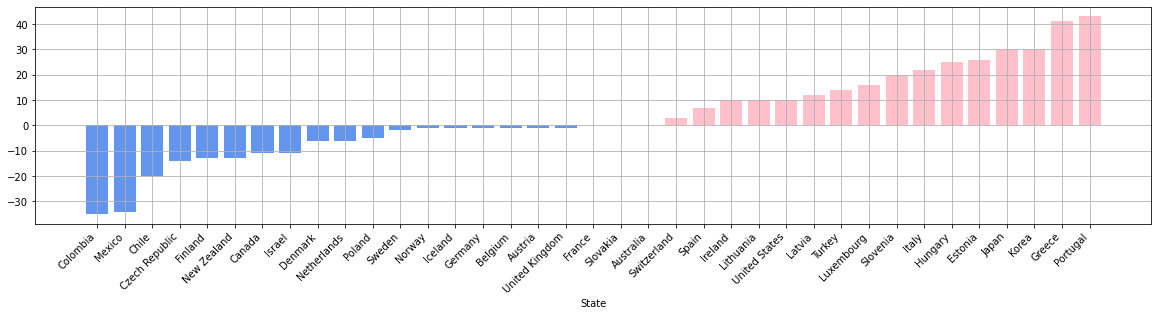

In [41]:
unhappy_data=data[data['Sub']>0]
happy_data=data[data['Sub']<=0]
unhappy_data=unhappy_data.sort_values(by='Sub')
happy_data=happy_data.sort_values(by='Sub')

plt.figure(figsize=(20,4))
plt.bar(happy_data['Country'], happy_data['Sub'],color='cornflowerblue')
plt.bar(unhappy_data['Country'], unhappy_data['Sub'],color='pink')
plt.grid(True)
plt.xlabel('State')
plt.xticks(rotation=45, ha='right')
plt.show()

In [42]:
unhappy_data

,index,Country,OECD,Real_house_price,Safety,Working_age_popul,Elderly_popul,Working_hours,Unemploy_rate,Employ_rate,Gini_coff,2018_GDP,2018_GDP_Rank,Happiness_score,Happiness_score_rank,Sub
32,32,Switzerland,v,108.5,85.0,66.6,18.4,1556.9,4.81525,80.500,0.299,82818.108162,2,7.487,5,3
30,30,Spain,v,119.6,82.0,65.8,19.3,1686.0,15.55000,63.300,0.330,30389.360990,29,6.310,36,7
14,14,Ireland,v,126.7,76.0,65.4,13.9,1772.0,5.62475,69.525,0.295,78621.227931,4,6.977,14,10
19,19,Lithuania,v,120.2,NaN,65.2,19.7,1635.0,8.54150,73.000,0.361,19176.176518,40,5.952,50,10
35,35,United States,v,117.8,74.0,65.4,16.0,1779.0,8.10850,71.375,0.390,62996.471285,8,6.886,18,10
18,18,Latvia,v,127.5,62.0,64.0,20.2,1661.0,8.11675,72.300,0.351,17858.279978,41,5.933,53,12
33,33,Turkey,v,91.1,60.0,67.9,8.6,NaN,13.17525,50.300,0.404,9455.593654,59,5.483,73,14
20,20,Luxembourg,v,124.1,76.0,69.5,14.4,1506.0,6.76675,67.925,0.318,116654.261067,1,6.910,17,16
28,28,Slovenia,v,124.0,86.0,65.3,19.7,1592.9,4.99175,71.850,0.249,26115.913366,31,5.948,51,20
16,16,Italy,v,96.0,58.0,64.0,22.7,1717.8,9.29150,59.050,0.334,34615.756891,25,6.000,47,22


In [43]:
unhappy_con=unhappy_data['Country']
happy_con=happy_data['Country']
print("unhappy ",unhappy_con)
print("happy ",happy_con)

unhappy  32      Switzerland
30            Spain
14          Ireland
19        Lithuania
35    United States
18           Latvia
33           Turkey
20       Luxembourg
28         Slovenia
16            Italy
12          Hungary
7           Estonia
17            Japan
29            Korea
11           Greece
26         Portugal
Name: Country, dtype: object
happy  36          Colombia
21            Mexico
4              Chile
5     Czech Republic
8            Finland
23       New Zealand
3             Canada
15            Israel
6            Denmark
22       Netherlands
25            Poland
31            Sweden
24            Norway
13           Iceland
10           Germany
2            Belgium
1            Austria
34    United Kingdom
9             France
27          Slovakia
0          Australia
Name: Country, dtype: object


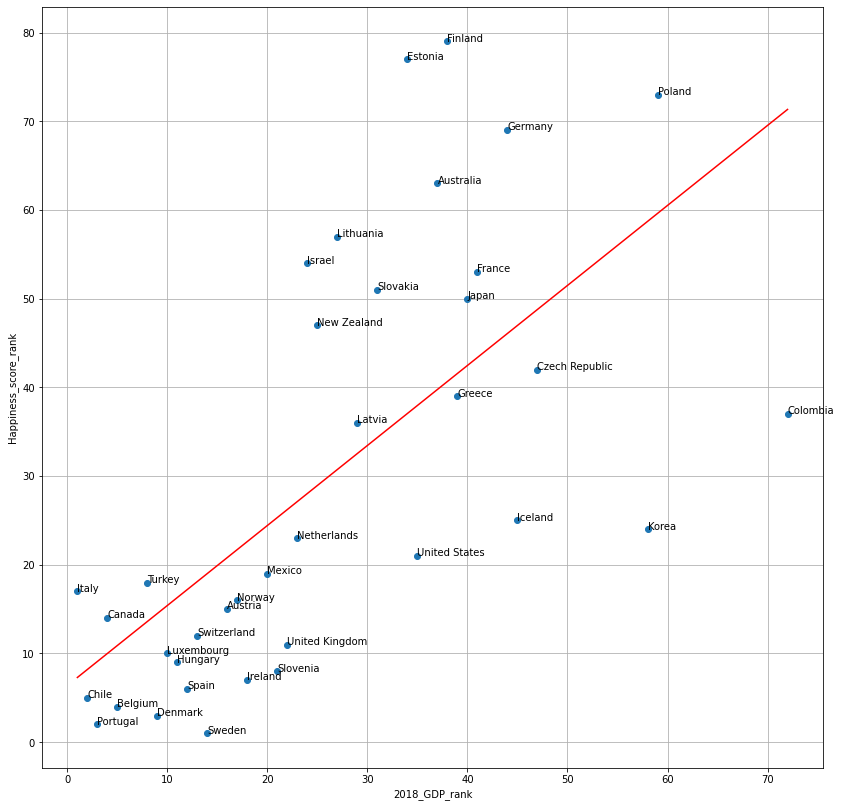

In [44]:
scatter_data=data.sort_values(by="2018_GDP_Rank")

plt.figure(figsize=(14,14))
plt.plot(scatter_data['2018_GDP_Rank'],scatter_data['Happiness_score_rank'],'o')

for i, txt in enumerate(scatter_data['Country']):
    plt.annotate(txt, (scatter_data['2018_GDP_Rank'][i], scatter_data['Happiness_score_rank'][i]))

scatter_data_linear=LinearRegression()
scatter_data_linear.fit(scatter_data['2018_GDP_Rank'].values.reshape(-1,1),scatter_data['Happiness_score_rank'])
scatter_data_prediction=scatter_data_linear.predict(scatter_data['2018_GDP_Rank'].values.reshape(-1,1))
plt.plot(scatter_data['2018_GDP_Rank'],scatter_data_linear.predict(scatter_data['2018_GDP_Rank'].values.reshape(-1,1)),color='r')

plt.xlabel('2018_GDP_rank')
plt.ylabel('Happiness_score_rank')
plt.grid(True)
plt.show()

In [45]:
'''
def make_data(dataframe, data):
    dataframe=dataframe.filter(['Happiness_score',data,'Country','Sub'])
    dataframe=dataframe.sort_values(by=data)
    dataframe=dataframe.reset_index()
    return dataframe

def make_plt(dataframe,data,unhappy_dataframe,happy_dataframe):
    for i in range(35):
        for j in unhappy_dataframe['Country']:
            if(dataframe['Country'][i]==j):
                plt.plot(dataframe[data][i],dataframe['Sub'][i],'o',color='red')
        for j in happy_dataframe['Country']:
            if(dataframe['Country'][i]==j):
                plt.plot(dataframe[data][i],dataframe['Sub'][i],'o',color='blue')
                
                
def make_linear(dataframe,data):
    linear=LinearRegression()
    linear.fit(dataframe[data].values.reshape(-1,1),dataframe['Sub'])
    pred=linear.predict(dataframe[data].values.reshape(-1,1))
    plt.plot(dataframe[data],linear.predict(dataframe[data].values.reshape(-1,1)))

    
    print('Score : ', linear.score(dataframe[data].values.reshape(-1,1),dataframe['Sub']))
    print('RMSE : ', mean_squared_error(pred, dataframe['Sub'])**0.5)
    print('MSE : ', mean_squared_error(pred, dataframe['Sub']),'\n')
    
    print("기울기 : ",linear.coef_)
    print("절편 : ",linear.intercept_,"\n\n")
    
    
def make_name(dataframe,data):
    for i, txt in enumerate(dataframe['Country']):
        plt.annotate(txt,(dataframe[data][i],dataframe['Sub'][i]))
        
        
def pearson_corr(dataframe,data):
    body=pd.DataFrame({'Sub':dataframe['Sub'],data:dataframe[data]})

    pearson_corr=body.corr(method='pearson')
    print('pearson_corr : {}\n\n'.format(pearson_corr))'''

r_color=['red','cornflowerblue']
happy=['happy','unhappy']

def make_data(dataframe, data):
    dataframe=dataframe.filter(['Happiness_score',data,'Country'])
    dataframe=dataframe.sort_values(by=data)
    dataframe=dataframe.reset_index()
    return dataframe

def make_plt(dataframe,data,num):
    plt.plot(dataframe[data],dataframe['Happiness_score'],'o',color=r_color[num],label=happy[num])
    
    
def make_linear(dataframe,data,num):
    linear=LinearRegression()
    linear.fit(dataframe[data].values.reshape(-1,1),dataframe['Happiness_score'])
    pred=linear.predict(dataframe[data].values.reshape(-1,1))
    plt.plot(dataframe[data],linear.predict(dataframe[data].values.reshape(-1,1)),color=r_color[num])
    
    print("========",happy[num],"======================================")
    
    print('Score : ', linear.score(dataframe[data].values.reshape(-1,1),dataframe['Happiness_score']))
    print('RMSE : ', mean_squared_error(pred, dataframe['Happiness_score'])**0.5)
    print('MSE : ', mean_squared_error(pred, dataframe['Happiness_score']),'\n')
    
    print("기울기 : ",linear.coef_)
    print("절편 : ",linear.intercept_,"\n\n")
    

def make_name(dataframe,data):
    for i, txt in enumerate(dataframe['Country']):
        plt.annotate(txt,(dataframe[data][i],dataframe['Happiness_score'][i]))
        
        
def pearson_corr(dataframe,data,num):
    body=pd.DataFrame({'Happiness_score':dataframe['Happiness_score'],data:dataframe[data]})

    pearson_corr=body.corr(method='pearson')
    print("========",politics[num],"======================================")
    print('pearson_corr : {}\n\n'.format(pearson_corr))

# House price

======== happy ======================================
Score :  0.0009948529543564177
RMSE :  0.480806996869607
MSE :  0.23117536823877025 

기울기 :  [-0.00163463]
절편 :  7.175379487044519 


======== unhappy ======================================
Score :  0.0015627894313252622
RMSE :  0.609038689206644
MSE :  0.37092812495054706 

기울기 :  [0.00161949]
절편 :  5.9238144144195015 




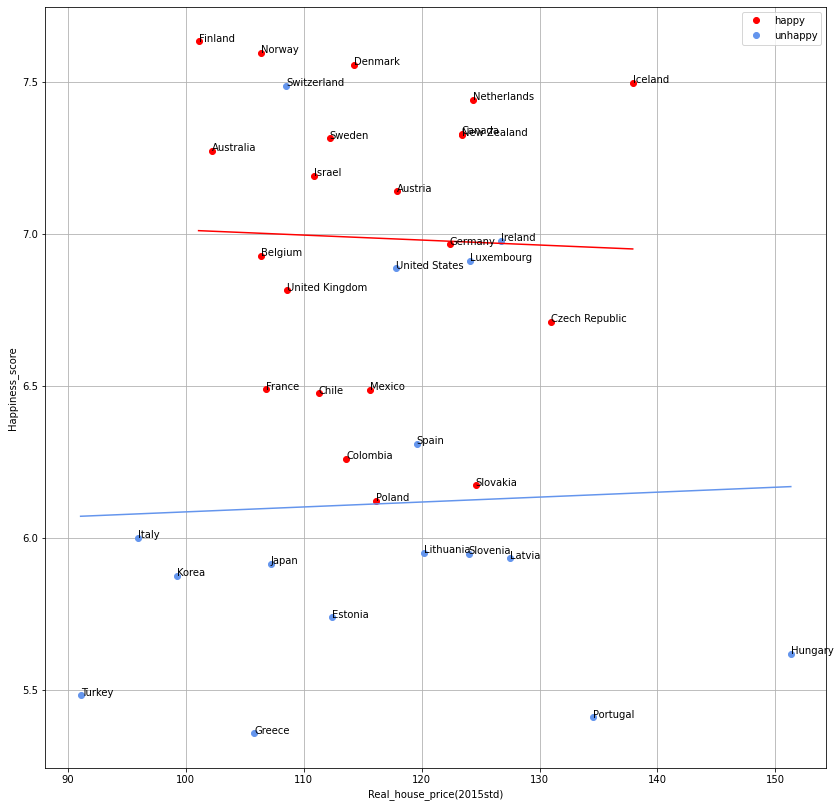

In [46]:
plt.figure(figsize=(14,14))

sub='Real_house_price'

house_happy=make_data(happy_data,sub)
house_unhappy=make_data(unhappy_data, sub)

make_name(house_happy,sub)
make_name(house_unhappy,sub)

make_plt(house_happy,sub,0)
make_plt(house_unhappy,sub,1)

make_linear(house_happy,sub,0)
make_linear(house_unhappy,sub,1)

plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Real_house_price(2015std)')
plt.ylabel('Happiness_score')
plt.grid(True)
plt.show()

In [47]:
def spearman_corr(dataframe,data,num):
    body=pd.DataFrame({'Happiness_score':dataframe['Happiness_score'],data:dataframe[data]})

    spearman_corr=stats.spearmanr(body.Real_house_price,body.Happiness_score)
    
    print("========",happy[num],"======================================")
    print('spearman_corr : {}\n\n'.format(spearman_corr))


spearman_corr(house_happy,data,0)
spearman_corr(house_unhappy,data,1)

ValueError: Boolean array expected for the condition, not int64